In [1]:
import Tasks2
from Tasks2 import final_data
import re

<h1>NGRAM Analysis</h1>

C Santos

In [2]:
import nltk 
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter

In [3]:
# Making Corpus
corpus_raw = " ".join(final_data["Lyric"])
corpus_raw = re.sub(",", "", corpus_raw)
corpus_raw = re.sub("\n", " ", corpus_raw)
corpus_raw = re.sub("\\\\", "", corpus_raw).lower()
corpus_raw = re.sub("[)(]", "", corpus_raw)
corpus_raw_split = corpus_raw_split = corpus_raw.split(" ")

In [4]:
# Trigram for corpus
corpus_trigram = Counter(ngrams(corpus_raw_split, 3)).most_common()
corpus_trigram_keys = [" ".join(key_tuple) for key_tuple in [key[0] for key in corpus_trigram]]
corpus_trigram_values = [item[1] for item in corpus_trigram]
corpus_trigram = {"trigram": corpus_trigram_keys, "freq": corpus_trigram_values}

In [5]:
# Bigram for corpus
corpus_bigram = Counter(ngrams(corpus_raw_split, 2)).most_common()
corpus_bigram_keys = [" ".join(key_tuple) for key_tuple in [key[0] for key in corpus_bigram]]
corpus_bigram_values = [item[1] for item in corpus_bigram]
corpus_bigram = {"bigram": corpus_bigram_keys, "freq": corpus_bigram_values}

In [6]:
# Make list of words for a list of songs
song_lyrics_list = [re.sub("[)(]", "", lyric) for lyric in [re.sub("\\\\", "", lyric).lower() for lyric in [re.sub("\n", " ", lyric) for lyric in [re.sub(",", "", lyric) for lyric in list(final_data["Lyric"])]]]]
song_words_list = [[word for word in word_list if word != ''] for word_list in  [x.split(" ") for x in song_lyrics_list]]

In [7]:
# List of bi/trigrams for a list of songs
# Formatted as list of counters
song_bigram = [Counter(ngrams(song_lyrics, 2)) for song_lyrics in song_words_list]
song_trigram = [Counter(ngrams(song_lyrics, 3)) for song_lyrics in song_words_list]

In [8]:
# Formatted to list of dictionaries
song_bigram = [{"bigram": [" ".join(key_tuple) for key_tuple in bigram.keys()], "freq": bigram.values()} for bigram in song_bigram]
song_trigram = [{"trigram": [" ".join(key_tuple) for key_tuple in trigram.keys()], "freq": trigram.values()} for trigram in song_trigram]


In [9]:
corpus_trigram["trigram"]

[u'na na na',
 u'yeah yeah yeah',
 u'low low low',
 u'oh oh oh',
 u'you make me',
 u'boom boom boom',
 u'bites the dust',
 u'i love you',
 u'you and me',
 u'another one bites',
 u'one bites the',
 u'ooh ooh ooh',
 u"tonight's gonna be",
 u'be a good',
 u'gonna be a',
 u"let's get it",
 u"that tonight's gonna",
 u'round and round',
 u'what you do',
 u'all night all',
 u'how do i',
 u'night all night',
 u'tu cuerpo alegria',
 u'dale a tu',
 u'a tu cuerpo',
 u'cuerpo alegria macarena',
 u'i saw the',
 u'the boy is',
 u'boy is mine',
 u'your body talk',
 u'whoomp there it',
 u"i know you're",
 u'there it went',
 u'saw the sign',
 u'for me ',
 u'na na na-na-na-naa',
 u'all night long',
 u'moves like jagger',
 u"you're still the",
 u'still the one',
 u'killing me softly',
 u'with his song',
 u'me softly with',
 u"rock n' roll",
 u'softly with his',
 u'and round and',
 u'we found love',
 u'a good night',
 u'love in a',
 u'she hit the',
 u'let me hear',
 u"night that tonight's",
 u'in the deep

In [10]:
# We don't want to look at bigrams/trigrams that appear exclusively in one song in our analysis
# so we will subset the desired bigrams/trigrams
bigram_in_song = [sum([cbigram in song["bigram"] for song in song_bigram ]) for cbigram in corpus_bigram["bigram"]]
non_unique_bigram_indices_songs = [(bigram > 1,bigram) for bigram in bigram_in_song]
trigram_in_song = [sum([ctrigram in song["trigram"] for song in song_trigram ]) for ctrigram in corpus_trigram["trigram"]]
non_unique_trigram_indices_songs = [(trigram > 1,trigram) for trigram in trigram_in_song]

In [11]:
from itertools import compress
# Format into dictionary containing the bi/trigram, total frequency, and number of songs occured in
non_unique_bigrams = list(compress(corpus_bigram["bigram"], [x[0] for x in non_unique_bigram_indices_songs]))
non_unique_trigrams = list(compress(corpus_trigram["trigram"], [x[0] for x in non_unique_trigram_indices_songs]))
nu_bigram_freq = list(compress(corpus_bigram["freq"], [x[0] for x in non_unique_bigram_indices_songs]))
nu_trigram_freq = list(compress(corpus_trigram["freq"], [x[0] for x in non_unique_trigram_indices_songs]))
songs_per_bigram = [y[1] for y in non_unique_bigram_indices_songs if y[0]]
songs_per_trigram = [y[1] for y in non_unique_trigram_indices_songs if y[0]]
shared_bigrams = {"bigram": non_unique_bigrams, "freq": nu_bigram_freq, "songs": songs_per_bigram}
shared_trigrams = {"trigram": non_unique_trigrams, "freq": nu_trigram_freq, "songs": songs_per_trigram}

In [12]:
import pandas as pd
# Frequency 
# The dictionaries "shared_bigrams" and "shared_trigrams" contain
# the bigram, the number of times occurred, and the number of songs occured in
# pd.DataFrame(shared_bigrams).sort_values(by="songs", ascending = False)
tri_by_songs = pd.DataFrame(shared_trigrams).sort_values(by="songs", ascending = False)
tri_by_freq  = pd.DataFrame(shared_trigrams).sort_values(by="freq", ascending = False)
bi_by_songs = pd.DataFrame(shared_bigrams).sort_values(by="songs", ascending = False)
bi_by_freq  = pd.DataFrame(shared_bigrams).sort_values(by="freq", ascending = False)

<h2>Visualization</h2>

In [13]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

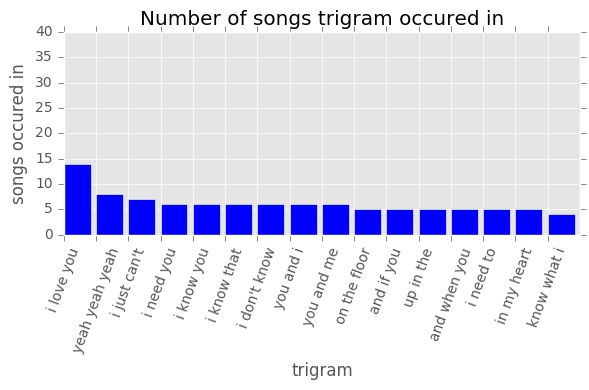

In [14]:
tri_by_song_y = list(tri_by_songs["songs"])[0:16]
plt.bar(range(16), tri_by_song_y, 1/1.2, color = "blue")
plt.xticks(range(16), list(tri_by_songs["trigram"])[0:16])
plt.xticks(rotation = 70)
plt.ylim([0,40])
plt.xlabel("trigram")
plt.ylabel("songs occured in")
plt.title("Number of songs trigram occured in")
plt.tight_layout()
plt.savefig('try_by_song.jpg')
plt.show()


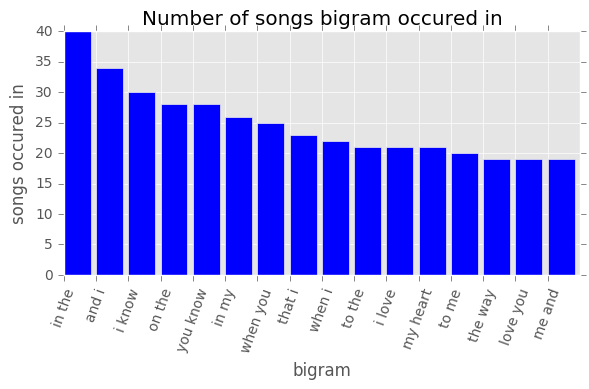

In [15]:
bi_by_song_y = list(bi_by_songs["songs"])[0:16]
plt.bar(range(16), bi_by_song_y, 1/1.2, color = "blue")
plt.xticks(range(16), list(bi_by_songs["bigram"])[0:16])
plt.xticks(rotation = 70)
plt.ylim([0,40])
plt.xlabel("bigram")
plt.ylabel("songs occured in")
plt.title("Number of songs bigram occured in")
plt.tight_layout()
plt.savefig('bi_by_song.jpg')
plt.show()


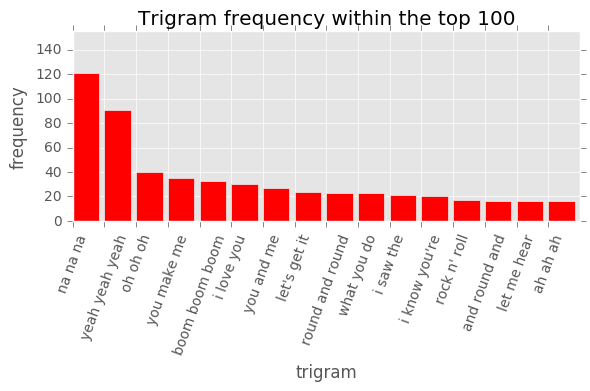

In [16]:
tri_by_freq_y = list(tri_by_freq["freq"])[0:16]
plt.bar(range(16), tri_by_freq_y, 1/1.2, color = "red")
plt.xticks(range(16), list(tri_by_freq["trigram"])[0:16])
plt.xticks(rotation = 70)
plt.ylim([0,155])
plt.xlabel("trigram")
plt.ylabel("frequency")
plt.title("Trigram frequency within the top 100")
plt.tight_layout()
plt.savefig('tri_by_freq.jpg')
plt.show()

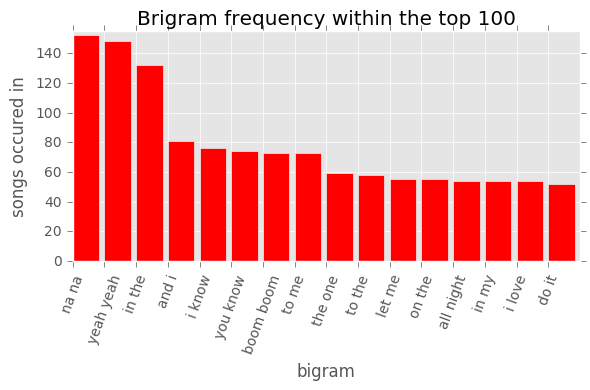

In [17]:
bi_by_freq_y = list(bi_by_freq["freq"])[0:16]
plt.bar(range(16), bi_by_freq_y, 1/1.2, color = "red")
plt.xticks(range(16), list(bi_by_freq["bigram"])[0:16])
plt.xticks(rotation = 70)
plt.ylim([0,155])
plt.xlabel("bigram")
plt.ylabel("songs occured in")
plt.title("Brigram frequency within the top 100")
plt.tight_layout()
plt.savefig("bi_by_freq.jpg")
plt.show()